<a href="https://colab.research.google.com/github/Manu-Anand/tf_certfication/blob/master/Copy_of_stroke_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import math 
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.preprocessing import LabelEncoder

In [0]:
def label_encoding(cat_variable):
  le = LabelEncoder()
  label_field = le.fit_transform(train_data[cat_variable])
  genre_mappings = {index: label for index, label in 
                    enumerate(le.classes_)}
  genre_mappings
  train_data[cat_variable] = label_field

Please keep the train_2v.csv in the same folder as the python file

In [0]:
train_data = pd.read_csv('train_2v.csv')
# Smoking status got many Nan Values. So Drops them. Recheck other alternatives
train_data = train_data[train_data['smoking_status'].notna()]
label_encoding("work_type")
label_encoding("Residence_type")
label_encoding("ever_married")
label_encoding("gender")
label_encoding("smoking_status")
train_data.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0


In [0]:
train_data.describe(include = 'all')
# The below code shows there are many null values
print('Train columns with null values:\n', train_data.isnull().sum())

Train columns with null values:
 id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1036
smoking_status          0
stroke                  0
dtype: int64


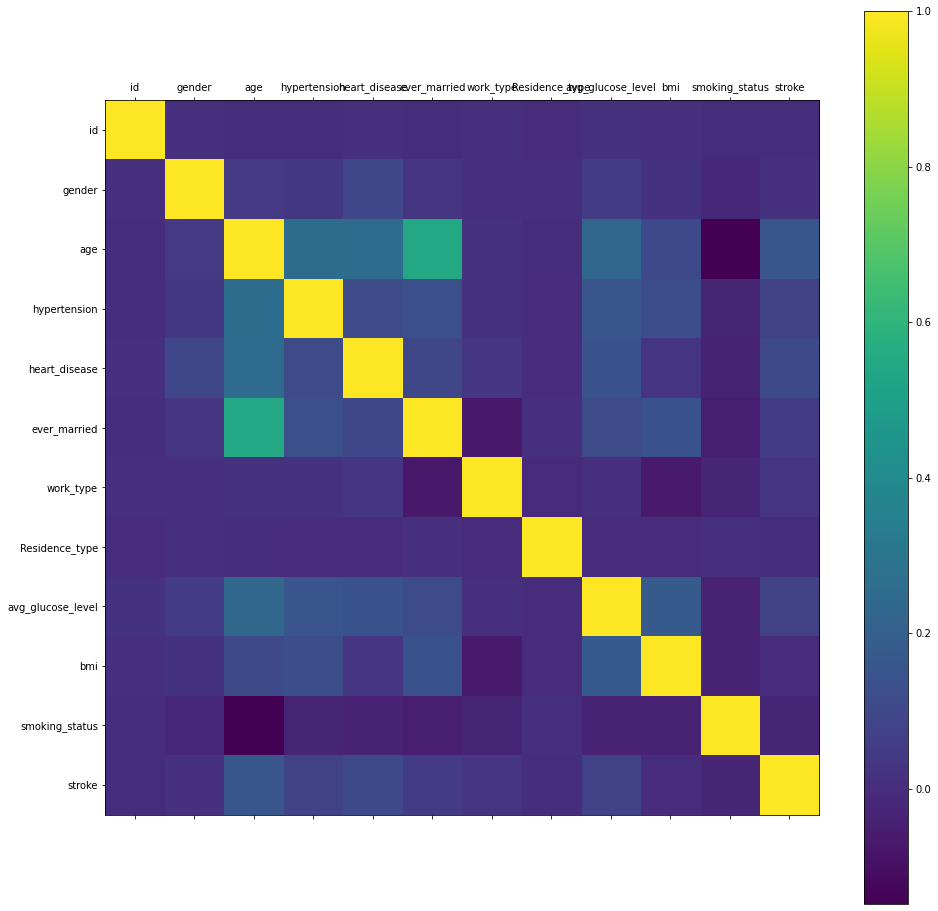

In [0]:
# Displays correlation metrics
# Inference - Age and marriage has some correlation. All other fileds shows very less correlation
rcParams['figure.figsize'] = 20, 30
plt.matshow(train_data.corr())
plt.yticks(np.arange(train_data.shape[1]), train_data.columns)
plt.xticks(np.arange(train_data.shape[1]), train_data.columns)
plt.colorbar()

class count 0    42617
1      783
Name: stroke, dtype: int64


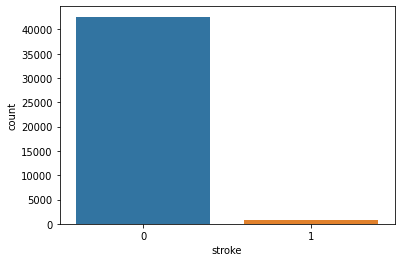

In [0]:
# The below code shows that  the data has class imbalance problem
# The data is unbalanced
class_count = train_data.stroke.value_counts()
print('class count', class_count)
ax = sns.countplot(x="stroke", data=train_data)

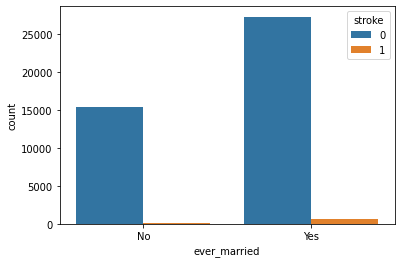

In [0]:

ax = sns.countplot(x="ever_married", data=train_data, hue="stroke")

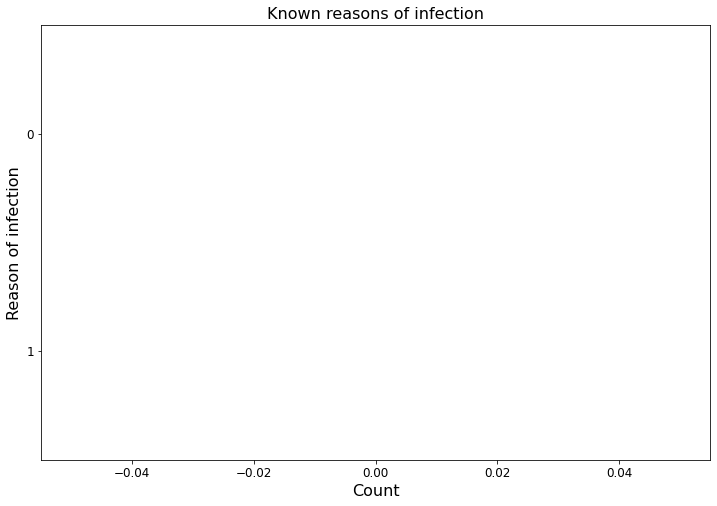

In [0]:
reason_order = list(train_data["stroke"].value_counts().index)

plt.figure(figsize=(12, 8))
sns.countplot(y = "avg_glucose_level",
              data=train_data,
              order=reason_order)
plt.title("Known reasons of infection", fontsize=16)
plt.xlabel("Count", fontsize=16)
plt.ylabel("Reason of infection", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [0]:
# Split the data into predictors and target
X_train = train_data.drop(['Survived', 'Name'], axis = 1)
X_test = test_data.drop(['Name'], axis = 1)
y_train = train_data['Survived']